# Random Forest Regression: When Does It Fail and Why?

## Random Forest Regression vs Linear Regression

Random Forest Regression is quite a robust algorithm, however, the question is should you use it for regression?

Why not use linear regression instead?  The function in a Linear Regression can easily be written as y=mx + c while a function in a complex Random Forest Regression seems like a black box that can’t easily be represented as a function. 

Generally, Random Forests produce better results, work well on large datasets, and are able to work with missing data by creating estimates for them. However, they pose a major challenge that is that they can’t extrapolate outside unseen data. We’ll dive deeper into these challenges in a minute 

## Decision Tree Regression

Decision Trees are great for obtaining non-linear relationships between input features and the target variable.

The inner working of a Decision Tree can be thought of as a bunch of if-else conditions.

It starts at the very top with one node. This node then splits into a left and right node — decision nodes. These nodes then split into their respective right and left nodes. 

At the end of the leaf node, the average of the observation that occurs within that area is computed. The most bottom nodes are referred to as leaves or terminal nodes.

The value in the leaves is usually the mean of the observations occurring within that specific region. For instance in the right most leaf node below, 552.889 is the average of the 5 samples.

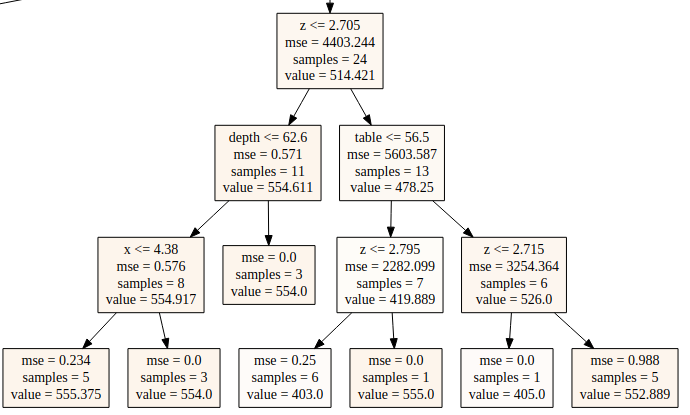

How far this splitting goes is what is known as the depth of the tree. This is one of the hyperparameters that can be tuned. The maximum depth of the tree is specified so as to prevent the tree from becoming too deep — a scenario that leads to overfitting. 

## Random Forest Regression
Random forest is an ensemble of decision trees. This is to say that many trees, constructed in a certain “random” way form a Random Forest. 

- Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting. 
- Each of the trees makes its own individual prediction. 
- These predictions are then averaged to produce a single result. 

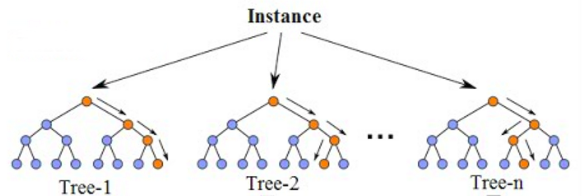

The averaging makes a Random Forest better than a single Decision Tree hence improves its accuracy and reduces overfitting. 

A prediction from the Random Forest Regressor is an average of the predictions produced by the trees in the forest. 

## Example of trained Linear Regression and Random Forest

In order to dive in further, let’s look at an example of a Linear Regression and a Random Forest Regression. For this, we’ll apply the Linear Regression and a Random Forest Regression to the same dataset and compare the result. 

Let’s take this example dataset where you should predict the price of diamonds based on other features like carat, depth, table, x, y and z. If we look at the distribution of price below:

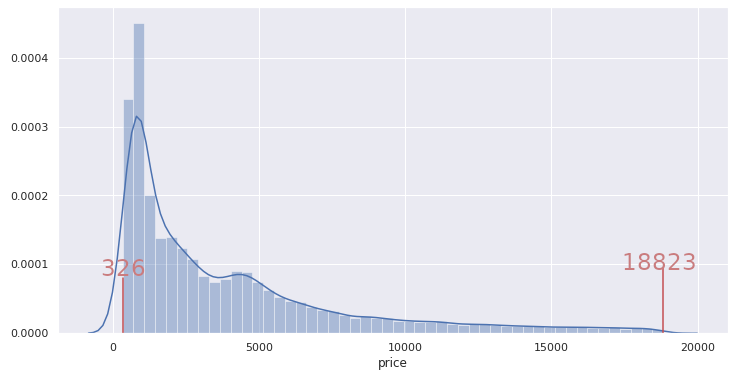

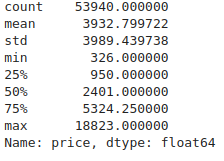

We can see that the price ranges from 326 to 18823.

Let’s train the Linear Regression model and run predictions on the validation set.

The distribution of predicted prices is the following:

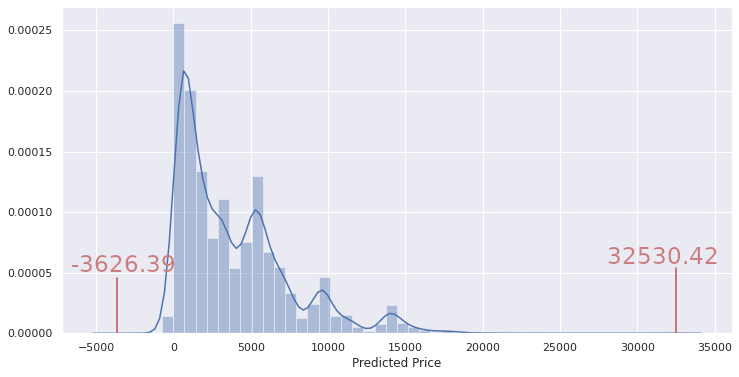

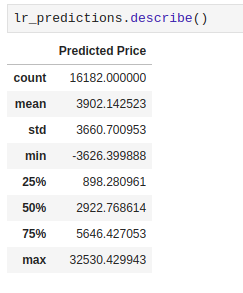

**Predicted prices are clearly outside the range of values of “price” seen in the training dataset.** 

A Linear Regression model, just like the name suggests, created a linear model on the data. A simple way to think about it is in the form of y = mx+C. Therefore, since it fits a linear model, it is able to obtain values outside the training set during prediction. It is able to extrapolate based on the data.

Let’s now look at the results obtained from a Random Forest Regressor using the same dataset.

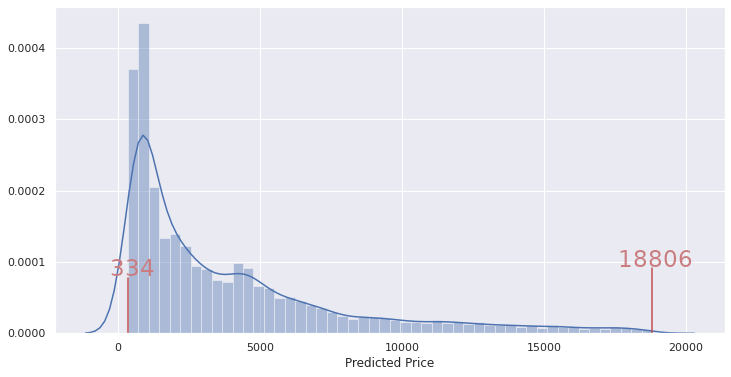

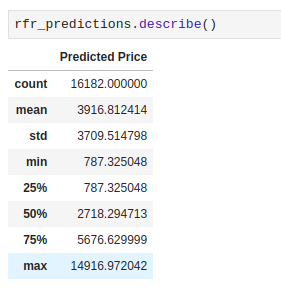

These values are clearly within the range of 326 and 18823 — just like in our training set. There are no values outside that range. Random Forest cannot extrapolate.

## Extrapolation problem 

As you have seen above, when using a Random Forest Regressor, the predicted values are never outside the training set values for the target variable.

If you look at prediction values they will look like this:

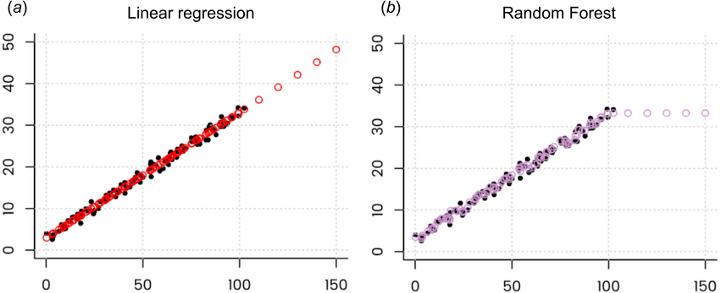

Wondering why?

Let’s explore that phenomenon here. The data used above has the following columns carat, depth, table, x, y, z for predicting the price.

The diagram below shows one decision tree from the Random Forest Regressor. 

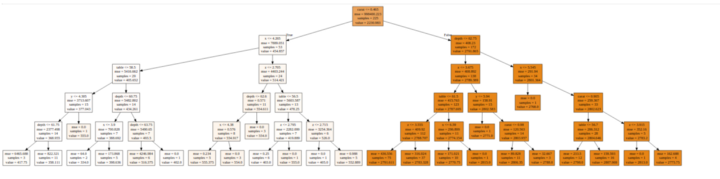

Let’s zoom in to a smaller section of this tree. For example, there are 4 samples with depth $<= 62.75$, $x <= 5.545$, carat $<= 0.905$, and $z <= 3.915$. The price being predicted for these is 2775.75. This figure represents the mean of all these four samples. Therefore, any value in the test set that falls in this leaf will be predicted as 2775.75. 

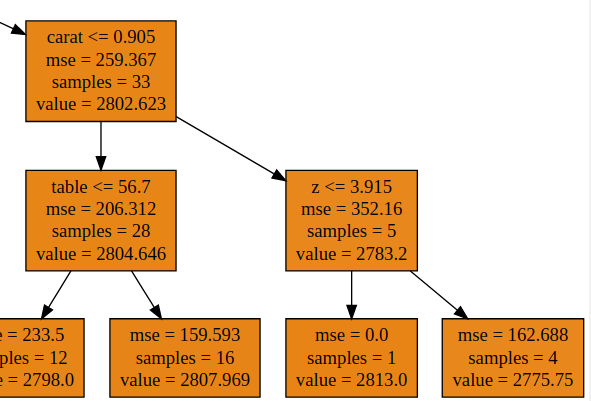

This is to say that when the Random Forest Regressor is tasked with the problem of predicting for values not previously seen, it will always predict an average of the values seen previously. Obviously the average of a sample can not fall outside the highest and lowest values in the sample. 

The **Random Forest Regressor is unable to discover trends that would enable it in extrapolating values that fall outside the training set.** When faced with such a scenario, the regressor assumes that the prediction will fall close to the maximum value in the training set. Figure 1 above illustrates that.

Potential solutions
Ok, so how can you deal with this extrapolation problem?

There are a couple of options:

- Use a linear model such as SVM regression, Linear Regression, etc
- Build a deep learning model because neural nets are able to extrapolate (they are basically stacked linear regression models on steroids)
- Combine predictors using stacking. For example, you can create a stacking regressor using a Linear model and a Random Forest Regressor. 
- Use modified versions of random forest